In [1]:
import numpy as np, scipy, matplotlib.pyplot as plt, scipy.integrate
plt.style.use(('presentation'))

### Problem 1

**Part (b)** - The problem is of a particle moving in potential $V(x) =  \alpha x^2/2 + \beta x^4/4$

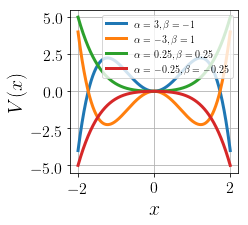

In [2]:
def V(alpha,beta,x):
    x = np.asarray(x)
    return alpha*x**2 + beta*x**4

params = [[3,-1],[-3,1],[0.25,0.25],[-0.25,-0.25]]
x = np.linspace(-2,2,10000)

plt.figure(figsize=(3,3))

for parameter in params:
    alpha, beta = parameter
    plt.plot(x,V(alpha,beta,x),label=r'$\alpha = %s, \beta = %s$'%(alpha,beta))
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.legend()
plt.savefig('1.png')

As is clearly evident from the plots (and the equation for $V(x)$),the function will have an extremum as $x=0$, irrespective of the value of $\alpha$ and $\beta$.

* For $(\alpha,\beta)=(3,-1)$, the potential is bounded from above. 
* For $(\alpha,\beta)=(-3,1)$, the potential is bounded from below
* For $(\alpha,\beta)=(0.25,0.25)$, the potential is bounded from below
* For $(\alpha,\beta)=(-0.25,-0.25)$, the potential is bounded from below

**Part (c)** -When $\delta = 0$, the energy can be written as $E = m\dot{x}^2/2 + \alpha x^2/2 + \beta x^4/4$. In the phase space, a constant value of energy will give a closed curve.

/home/aditya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


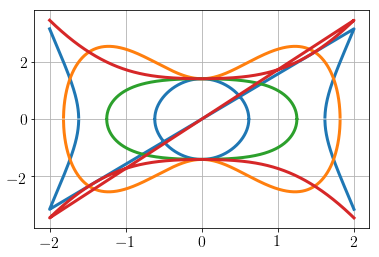

In [3]:
def xdot(E,m,alpha,beta,x):
    x = np.asarray(x)
    return np.sqrt((2./m)*(E - V(alpha,beta,x)))

m = 1.0
E = 1.0
for parameter in params:
    alpha, beta = parameter
    xd = xdot(E,m,alpha,beta,x)
    plt.plot(np.append(x,x),np.append(xd,-xd))

When $\delta \ne 0$, there is dissipation in the system, and hence the phase space plots will differ. We now solve the resultant equation of motion $m \ddot{x} + \delta \dot{x} + \alpha x + \beta x^3 = 0$ numerically (taking $m=1)$.

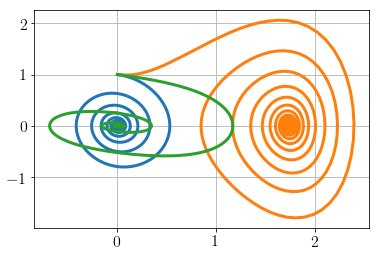

In [4]:
params = params = [[3,-1,0.25],[-3,1,0.25],[0.25,0.25,0.25]]
for alpha, beta, delta in params:
    def f(t,y):
        x = y[0]
        xd = y[1]
        return np.array([xd, -delta*xd -alpha*x - beta*x**3])
    ini = [0,1]
    sol = scipy.integrate.solve_ivp(f,[0,1000],[ini[0],ini[1]],
                                        t_eval=np.linspace(0,500,10000))
    plt.plot(sol.y[0],sol.y[1])
plt.show()